# Event Study:Dividend increase (By SMRMJ)

In [1]:
import pandas as pd
from datetime import datetime  
import statsmodels.api as sm 
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
import wrds, sqlite3, seaborn
import math

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
local_sql = sqlite3.connect(':memory:')
local_sql.create_function('sqrt',1,math.sqrt) # Generate a sqrt function in sqlite

## Data Import and management

In [3]:
dsf = pd.read_sas(r'D:\Code Library\FIN3380_summer\Project_2\dsf.sas7bdat')
dsf

,PERMNO,PERMCO,DATE,RET,PRC,VOL,SHROUT,CFACPR,CFACSHR
0,10002.0,7954.0,2011-01-18,-0.036101,2.670000,205975.0,17639.0,1.0,1.0
1,10002.0,7954.0,2011-01-19,-0.018727,2.620000,16390.0,17639.0,1.0,1.0
2,10002.0,7954.0,2011-01-20,-0.007634,2.600000,23765.0,17639.0,1.0,1.0
3,10002.0,7954.0,2011-01-21,0.015385,2.640000,15308.0,17639.0,1.0,1.0
4,10002.0,7954.0,2011-01-24,0.000000,2.640000,24535.0,17639.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
6004002,93436.0,53453.0,2022-01-10,0.030342,1058.119995,30455813.0,1033534.0,1.0,1.0
6004003,93436.0,53453.0,2022-01-11,0.005935,1064.400024,21942784.0,1033534.0,1.0,1.0
6004004,93436.0,53453.0,2022-01-12,0.039290,1106.219971,27790685.0,1033534.0,1.0,1.0
6004005,93436.0,53453.0,2022-01-13,-0.067491,1031.560059,32269410.0,1033534.0,1.0,1.0


In [4]:
dsi = pd.read_sas(r'D:\Code Library\FIN3380_summer\Project_2\dsi.sas7bdat')
dsi

,DATE,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx,totval,totcnt,usdval,usdcnt
0,1925-12-31,NaN,NaN,NaN,NaN,NaN,NaN,2.748749e+07,503.0,NaN,NaN
1,1926-01-02,0.005689,0.005689,0.009516,0.009516,NaN,NaN,2.760030e+07,497.0,2.736676e+07,494.0
2,1926-01-04,0.000706,0.000706,0.005780,0.005780,NaN,NaN,2.757789e+07,502.0,2.747972e+07,495.0
3,1926-01-05,-0.004821,-0.004867,-0.001927,-0.002030,NaN,NaN,2.753021e+07,501.0,2.756176e+07,499.0
4,1926-01-06,-0.000423,-0.000427,0.001182,0.001155,NaN,NaN,2.761877e+07,505.0,2.752684e+07,500.0
...,...,...,...,...,...,...,...,...,...,...,...
25355,2022-03-25,0.003112,0.003087,-0.003684,-0.003765,0.005066,4543.06,5.978537e+10,8912.0,5.960053e+10,8909.0
25356,2022-03-28,0.006114,0.006112,-0.002104,-0.002124,0.007145,4575.52,6.015547e+10,8914.0,5.978507e+10,8911.0
25357,2022-03-29,0.014679,0.014676,0.017348,0.017323,0.012257,4631.60,6.103788e+10,8914.0,6.015231e+10,8912.0
25358,2022-03-30,-0.007621,-0.007766,-0.008686,-0.008840,-0.006294,4602.45,6.056444e+10,8916.0,6.103671e+10,8913.0


In [5]:
factor = pd.read_sas(r'D:\Code Library\FIN3380_summer\Project_2\factors_daily.sas7bdat')
factor

,date,mktrf,smb,hml,rf,umd
0,1926-07-01,0.0010,-0.0023,-0.0028,0.00009,NaN
1,1926-07-02,0.0045,-0.0034,-0.0003,0.00009,NaN
2,1926-07-06,0.0017,0.0029,-0.0038,0.00009,NaN
3,1926-07-07,0.0009,-0.0059,0.0000,0.00009,NaN
4,1926-07-08,0.0021,-0.0038,0.0018,0.00009,NaN
...,...,...,...,...,...,...
25246,2022-05-24,-0.0123,-0.0094,0.0184,0.00001,0.0226
25247,2022-05-25,0.0122,0.0078,0.0021,0.00001,-0.0090
25248,2022-05-26,0.0218,0.0020,-0.0063,0.00001,-0.0089
25249,2022-05-27,0.0258,0.0035,-0.0130,0.00001,-0.0073


In [6]:
event = pd.read_sas(r'D:\Code Library\FIN3380_summer\Project_2\wrds_keydev_students.sas7bdat')
event = event[event.keydeveventtypeid == 46.0] # Choose the dividend increase event
event = event[['PERMNO','announcedate']].reset_index(drop = True)
event = event.rename(columns = {'announcedate':'adate','PERMNO':'permno'})
event

,permno,adate
0,86845.0,2001-12-19
1,88749.0,2002-01-19
2,80031.0,2002-01-24
3,84740.0,2002-01-24
4,47706.0,2002-02-07
...,...,...
1854,88568.0,2022-03-02
1855,70228.0,2022-03-08
1856,13116.0,2022-03-08
1857,79007.0,2022-03-16


In [7]:
dsf.to_sql('dsf', local_sql, index = False, if_exists = 'replace')
dsi.to_sql('dsi', local_sql, index = False, if_exists = 'replace')
factor.to_sql('factor', local_sql, index = False, if_exists = 'replace')
event.to_sql('event', local_sql, index = False, if_exists = 'replace') # Import the data to sql server

1859

In [8]:
sqlcode = """
        select distinct date
        from dsi
        order by date;
"""

crsp_day = pd.read_sql_query(sqlcode, local_sql)
crsp_day = crsp_day.reset_index()
crsp_day.columns = ['crspday','date']
crsp_day['date'] = pd.to_datetime(crsp_day.date).dt.strftime('%Y-%m-%d')
crsp_day

,crspday,date
0,0,1925-12-31
1,1,1926-01-02
2,2,1926-01-04
3,3,1926-01-05
4,4,1926-01-06
...,...,...
25355,25355,2022-03-25
25356,25356,2022-03-28
25357,25357,2022-03-29
25358,25358,2022-03-30


In [9]:
crsp_day.to_sql('crsp_day', local_sql, index=False, if_exists='replace') 

25360

In [10]:
sqlcode = """
    select distinct a.*, crspday
    from event as a left join crsp_day as b
    on adate<=date and date<=date(adate, "4 day")
    group by a.permno, adate
    having date = min(date)
"""
event = pd.read_sql_query(sqlcode, local_sql)
event['adate'] = pd.to_datetime(event.adate).dt.strftime('%Y-%m-%d')
event # Deal with the non-trading date problem

,permno,adate,crspday
0,10026.0,2016-12-08,24024
1,10044.0,2012-05-03,22866
2,10107.0,2004-07-20,20903
3,10137.0,2007-10-04,21712
4,10145.0,2008-12-12,22013
...,...,...,...
1841,93382.0,2012-02-15,22812
1842,93397.0,2014-06-25,23404
1843,93399.0,2011-11-04,22743
1844,93423.0,2012-10-24,22987


In [11]:
estper=200;                       #Length of the estimation window in trading days                       
pos=60;                           #End of the event window (greater than CAR_to)                         
pre=-30;                          #Beginning of Abnormal Return Window(less than CAR_from for a est.GAP) 
minest=120;                       #Minimum of non-missing returns required for estimation                
CAR_from=-5;                      #Beginning of event window of interest                                 
CAR_to=5;                         #End of event window of interest                                       
evtwin=CAR_to-CAR_from + 1;       #length of event window in trading days

In [12]:
event.to_sql('event', local_sql, index=False, if_exists='replace')  

1846

## Estimation period generate

In [13]:
sqlcode="""
    select distinct a.*, 
    d.date as estper_beg, /*Start of the Estimation Window*/
    e.date as estper_end, /*End of the Estimation Window*/
    b.date as evtwin_beg, /*Start of the Abnormal Return Window*/
    a.adate as evtdate, /*Event Date*/
    c.date as evtwin_end /*End of the Abnormal Return Window*/
    from event as a inner join crsp_day as b
    on b.crspday-a.crspday= {} /*pre*/
    inner join crsp_day as c
    on c.crspday-a.crspday= {} /*pos*/
    inner join crsp_day as d
    on b.crspday-d.crspday= {} /*estper*/
    inner join crsp_day as e
    on b.crspday-e.crspday=1 /*The gap between est_end and evt_beg*/
""".format(pre-1, pos-1, estper)
tradedates=pd.read_sql_query(sqlcode, local_sql)

In [14]:
tradedates

,permno,adate,crspday,estper_beg,estper_end,evtwin_beg,evtdate,evtwin_end
0,10026.0,2016-12-08,24024,2016-01-12,2016-10-25,2016-10-26,2016-12-08,2017-03-08
1,10044.0,2012-05-03,22866,2011-06-06,2012-03-20,2012-03-21,2012-05-03,2012-07-30
2,10107.0,2004-07-20,20903,2003-08-19,2004-06-03,2004-06-04,2004-07-20,2004-10-13
3,10137.0,2007-10-04,21712,2006-11-02,2007-08-21,2007-08-22,2007-10-04,2007-12-31
4,10145.0,2008-12-12,22013,2008-01-16,2008-10-29,2008-10-30,2008-12-12,2009-03-12
...,...,...,...,...,...,...,...,...
1778,93382.0,2012-02-15,22812,2011-03-18,2011-12-30,2012-01-03,2012-02-15,2012-05-11
1779,93397.0,2014-06-25,23404,2013-07-26,2014-05-12,2014-05-13,2014-06-25,2014-09-19
1780,93399.0,2011-11-04,22743,2010-12-08,2011-09-22,2011-09-23,2011-11-04,2012-02-02
1781,93423.0,2012-10-24,22987,2011-11-25,2012-09-11,2012-09-12,2012-10-24,2013-01-24


## Link the the dsf table with factor table

In [15]:
permno_tuple = tuple(tradedates['permno'])

sqlcode = """
    select distinct permno, a.date, a.ret, ret-rf as retrf, mktrf, smb, hml, umd,
    mktrf+rf as mkt, ret-mktrf-rf as exret
    from dsf as a inner join factor as b
    on a.date = b.date and permno in {}
    order by a.permno, a.date;
""".format(permno_tuple)

daily_rets = pd.read_sql_query(sqlcode, local_sql)
daily_rets = daily_rets.rename(columns = {'PERMNO':'permno','DATE':'date','RET':'ret'})
daily_rets['date'] = pd.to_datetime(daily_rets.date).dt.strftime('%Y-%m-%d')
daily_rets

,permno,date,ret,retrf,mktrf,smb,hml,umd,mkt,exret
0,10026.0,2015-07-28,0.046123,0.046123,0.0123,-0.0036,-0.0014,-0.0091,0.0123,0.033823
1,10026.0,2015-07-29,-0.008024,-0.008024,0.0074,-0.0039,0.0052,-0.0102,0.0074,-0.015424
2,10026.0,2015-07-30,0.010090,0.010090,0.0012,0.0015,-0.0027,0.0020,0.0012,0.008890
3,10026.0,2015-07-31,0.019203,0.019203,-0.0015,0.0084,-0.0100,0.0120,-0.0015,0.020703
4,10026.0,2015-08-03,-0.004224,-0.004224,-0.0034,-0.0033,-0.0020,0.0099,-0.0034,-0.000824
...,...,...,...,...,...,...,...,...,...,...
2520848,93429.0,2020-12-07,0.003864,0.003864,0.0003,0.0021,-0.0101,0.0152,0.0003,0.003564
2520849,93429.0,2020-12-08,-0.023097,-0.023097,0.0047,0.0100,-0.0073,0.0011,0.0047,-0.027797
2520850,93429.0,2020-12-09,-0.027145,-0.027145,-0.0103,-0.0008,0.0133,-0.0138,-0.0103,-0.016845
2520851,93429.0,2020-12-10,-0.021827,-0.021827,0.0024,0.0111,-0.0045,-0.0017,0.0024,-0.024227


In [16]:
tradedates.to_sql('tradedates', local_sql, index=False, if_exists='replace') 
daily_rets.to_sql('daily_rets', local_sql, index=False, if_exists='replace') 

2520853

## Get the regression panel

In [17]:
sqlcode="""    
    select distinct a.*, c.crspday-a.crspday+1 as day, b.date, mktrf, mkt, smb, hml, umd, ret, retrf, exret
    from tradedates as a inner join daily_rets as b
    on a.permno=b.permno and b.date>=estper_beg and b.date<=evtwin_end
    left join crsp_day as c
    on b.date=c.date
    order by permno, adate, day; 
"""
reg_panel=pd.read_sql_query(sqlcode, local_sql)

In [18]:
reg_panel[:3]

,permno,adate,crspday,estper_beg,estper_end,evtwin_beg,evtdate,evtwin_end,day,date,mktrf,mkt,smb,hml,umd,ret,retrf,exret
0,10026.0,2016-12-08,24024,2016-01-12,2016-10-25,2016-10-26,2016-12-08,2017-03-08,-230,2016-01-12,0.0072,0.0072,-0.0041,-0.0079,0.0104,0.008666,0.008666,0.001466
1,10026.0,2016-12-08,24024,2016-01-12,2016-10-25,2016-10-26,2016-12-08,2017-03-08,-229,2016-01-13,-0.0267,-0.0267,-0.0073,0.0081,0.0016,-0.027369,-0.027369,-0.000669
2,10026.0,2016-12-08,24024,2016-01-12,2016-10-25,2016-10-26,2016-12-08,2017-03-08,-228,2016-01-14,0.0165,0.0165,0.0000,-0.0038,-0.0064,0.010199,0.010199,-0.006301


In [19]:
# Define an OLS function with statsmodels module
def regOLS(data, yvar, xvars=None):
    data['const']=1
    y = data[yvar]
    
    if xvars==None:
        X = data['const']
    else: 
        X = pd.concat([data['const'], data[xvars]], axis=1)
    
    result = sm.OLS(y, X).fit() 
    yhat = result.predict(X)
    
    param2 = {'nobs': result.nobs, 'rmse':rmse(y, yhat)} # calc rmse
    param2 = pd.Series(data=param2, index=['nobs', 'rmse'])
    
    res=result.params.append(param2)
    return res

In [20]:
#We only keep the daily records over the estimation window prior to S&P inclusion events
est_panel=reg_panel[(reg_panel['estper_beg']<=reg_panel['date'])&(reg_panel['date']<=reg_panel['estper_end'])]
est_panel=est_panel.dropna() #Drop the missing values

#Calcuate total return variance and count Nobs
params_mar=est_panel.groupby(['permno', 'adate']).apply(regOLS, 'exret') #MAR 

#We conduct calculate OLS estimates of various models for each event. 
params_mm=est_panel.groupby(['permno', 'adate']).apply(regOLS, 'ret', 'mkt') #MM
params_ff3=est_panel.groupby(['permno', 'adate']).apply(regOLS, 'retrf', ['mktrf', 'smb', 'hml']) #FF3
params_ff4=est_panel.groupby(['permno', 'adate']).apply(regOLS, 'retrf', ['mktrf', 'smb', 'hml', 'umd']) #FF3+UMD

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=result.params.append(param2)
<ipython-input-19-5193ffe42fa8>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res=resu

In [21]:
params_mar.head(3)

,,const,nobs,rmse
permno,adate,,,
10026.0,2016-12-08,-0.000224,200.0,0.009383
10044.0,2012-05-03,-0.000717,200.0,0.021327
10107.0,2004-07-20,-0.000528,200.0,0.011322


In [22]:
params_ff3.head(3)

,,const,mktrf,smb,hml,nobs,rmse
permno,adate,,,,,,
10026.0,2016-12-08,0.000052,0.626822,0.009592,-0.061355,200.0,0.008760
10044.0,2012-05-03,-0.000415,0.268413,-0.467297,-0.223253,200.0,0.015403
10107.0,2004-07-20,-0.000475,1.231080,-0.136828,-0.501331,200.0,0.011170


In [23]:
params_ff4.head(3)

,,const,mktrf,smb,hml,umd,nobs,rmse
permno,adate,,,,,,,
10026.0,2016-12-08,0.000242,0.810256,0.440733,0.276443,0.537406,200.0,0.007853
10044.0,2012-05-03,-0.000326,0.253494,-0.389111,0.051910,0.300319,200.0,0.015277
10107.0,2004-07-20,-0.000678,1.328993,0.015296,-0.374931,-0.319694,200.0,0.011117


In [24]:
car_panel=reg_panel[(reg_panel['day']>=pre) & (reg_panel['day']<=pos)]

car_panel.to_sql('car_panel', local_sql, if_exists='replace') 
params_mar.to_sql('params_mar', local_sql, if_exists='replace') 
params_mm.to_sql('params_mm', local_sql, if_exists='replace') 
params_ff3.to_sql('params_ff3', local_sql, if_exists='replace') 
params_ff4.to_sql('params_ff4', local_sql, if_exists='replace') 

1783

## Estimate the Abnormal Returns according to the model chosen

In [25]:
sqlcode="""      
    select distinct a.permno, a.adate, a.day, a.ret, b.nobs as nobs, 

    /*Market Adjusted Model's AR*/
    a.exret as abret0, b.rmse*b.rmse as var0, 

    /*Market Model's AR*/
    a.ret-c.const-c.mkt*a.mkt as abret1, c.rmse*c.rmse as var1, 

    /*Fama French 3 Factor's AR*/
    a.retrf-d.const-d.mktrf*a.mktrf-d.smb*a.smb-d.hml*a.hml as abret2, d.rmse*d.rmse as var2, 

    /*Fama French 3 Factor +UMD 's AR*/
    a.retrf-e.const-e.mktrf*a.mktrf-e.smb*a.smb-e.hml*a.hml-e.umd*a.umd as abret3, e.rmse*e.rmse as var3

    from car_panel as a inner join params_mar as b
    on a.permno=b.permno and a.adate=b.adate
    inner join params_mm as c
    on a.permno=c.permno and a.adate=c.adate
    inner join params_ff3 as d
    on a.permno=d.permno and a.adate=d.adate
    inner join params_ff4 as e
    on a.permno=e.permno and a.adate=e.adate

    /*minest (Minimum of non-missing returns required for estimation)*/
    where b.nobs > {} ; 
""".format(minest)

abrets_panel=pd.read_sql_query(sqlcode, local_sql) # Models fit and calculate abnormal returns

In [26]:
abrets_panel

,permno,adate,day,ret,nobs,abret0,var0,abret1,var1,abret2,var2,abret3,var3
0,10026.0,2016-12-08,-30,-0.003975,200.0,-0.001685,0.000088,-0.002592,0.000077,-0.002080,0.000077,0.003729,0.000062
1,10026.0,2016-12-08,-29,-0.009063,200.0,-0.005773,0.000088,-0.007056,0.000077,-0.006603,0.000077,-0.002805,0.000062
2,10026.0,2016-12-08,-28,0.014851,200.0,0.017741,0.000088,0.016609,0.000077,0.016666,0.000077,0.014912,0.000062
3,10026.0,2016-12-08,-27,0.009921,200.0,0.009711,0.000088,0.009747,0.000077,0.009789,0.000077,0.004829,0.000062
4,10026.0,2016-12-08,-26,-0.017192,200.0,-0.010402,0.000088,-0.013005,0.000077,-0.012834,0.000077,-0.009674,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162128,93429.0,2019-07-31,56,0.002748,200.0,0.007578,0.000223,0.003704,0.000163,-0.001017,0.000148,-0.002655,0.000147
162129,93429.0,2019-07-31,57,-0.012846,200.0,-0.020016,0.000223,-0.015373,0.000163,-0.017844,0.000148,-0.017921,0.000147
162130,93429.0,2019-07-31,58,-0.005118,200.0,-0.001788,0.000223,-0.004598,0.000163,-0.007595,0.000148,-0.005317,0.000147
162131,93429.0,2019-07-31,59,-0.005668,200.0,-0.008238,0.000223,-0.006860,0.000163,-0.009101,0.000148,-0.008471,0.000147


In [27]:
outlier = abrets_panel.sort_values(['abret0','abret1','abret2','abret3'], ascending = False).head(10)
outlier # Ten outliers

,permno,adate,day,ret,nobs,abret0,var0,abret1,var1,abret2,var2,abret3,var3
87919,79588.0,2015-11-18,12,0.719342,200.0,0.727642,0.000813,0.729403,0.000806,0.726972,0.000790,0.725926,0.000785
154084,91822.0,2020-02-20,20,0.623656,200.0,0.610496,0.000490,0.613059,0.000488,0.575723,0.000475,0.552803,0.000469
137519,89798.0,2009-10-29,17,0.620968,200.0,0.607968,0.007278,0.619502,0.006808,0.615394,0.006716,0.621044,0.006655
11205,12903.0,2015-01-14,-18,0.612903,200.0,0.591403,0.003133,0.566736,0.003030,0.557320,0.002965,0.533320,0.002914
150539,91257.0,2003-07-25,24,0.589092,200.0,0.582062,0.000426,0.584718,0.000289,0.584677,0.000282,0.584945,0.000281
124163,87242.0,2013-04-30,38,0.467061,200.0,0.478961,0.000281,0.480000,0.000281,0.479157,0.000278,0.480368,0.000278
134409,89413.0,2020-07-28,1,0.472036,200.0,0.458536,0.005215,0.449916,0.005095,0.436798,0.004729,0.437691,0.004707
137500,89798.0,2009-10-29,-2,0.442857,200.0,0.447957,0.007278,0.440635,0.006808,0.447862,0.006716,0.435647,0.006655
131983,89143.0,2013-07-25,32,0.452746,200.0,0.444746,0.000414,0.449138,0.000390,0.449016,0.000390,0.450593,0.000389
11245,12903.0,2015-01-14,22,0.425926,200.0,0.424226,0.003133,0.428838,0.003030,0.429622,0.002965,0.428812,0.002914


In [28]:
high_abret = abrets_panel[(abrets_panel.day == 0)|(abrets_panel.day == 1)].sort_values(['abret0','abret1','abret2','abret3'], ascending = False).head(10)
high_abret # Highest abnormal returns on day 0 or day 1

,permno,adate,day,ret,nobs,abret0,var0,abret1,var1,abret2,var2,abret3,var3
134409,89413.0,2020-07-28,1,0.472036,200.0,0.458536,0.005215,0.449916,0.005095,0.436798,0.004729,0.437691,0.004707
43237,34948.0,2011-03-29,1,0.336665,200.0,0.328765,0.001198,0.320265,0.001027,0.317404,0.000954,0.317636,0.000946
45511,38703.0,2008-07-16,0,0.327645,200.0,0.302375,0.000408,0.287616,0.000349,0.163343,0.000216,0.177084,0.000181
25875,16555.0,2018-05-23,1,0.297214,200.0,0.298754,0.000264,0.298733,0.000227,0.298460,0.000216,0.298341,0.000213
97190,81665.0,2017-05-04,1,0.289799,200.0,0.285169,0.000409,0.284310,0.000395,0.285396,0.000376,0.285545,0.000375
137047,89715.0,2006-01-31,0,0.277562,200.0,0.279492,0.000976,0.276741,0.000930,0.275645,0.000928,0.277348,0.000902
121942,86827.0,2019-02-25,1,0.273774,200.0,0.275274,0.000915,0.274493,0.000915,0.288230,0.000824,0.288263,0.000824
32608,20336.0,2013-05-08,0,0.278045,200.0,0.273645,0.000980,0.274938,0.000956,0.271923,0.000920,0.273987,0.000917
161163,93305.0,2018-02-22,1,0.278798,200.0,0.263338,0.000546,0.256700,0.000539,0.270775,0.000484,0.271651,0.000484
141324,90248.0,2020-02-20,0,0.256008,200.0,0.259448,0.000277,0.257172,0.000263,0.255799,0.000262,0.256057,0.000261


## Generate the graphs

In [29]:
car_graph=abrets_panel[(abrets_panel['day']<=10) & (abrets_panel['day']>=-10)].copy()

<ipython-input-30-dc9eb6bbbc54>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  car_graph[['RAW', 'CAR_MAR', 'CAR_MM', 'CAR_FF3', 'CAR_FF4']]=car_graph.groupby(['permno','adate'])['ret','abret0','abret1','abret2','abret3'].transform(pd.Series.cumsum)
<ipython-input-30-dc9eb6bbbc54>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  car_graph.groupby('day')['RAW', 'CAR_MAR', 'CAR_MM', 'CAR_FF3', 'CAR_FF4'].mean().plot(title='Cumulative Abnormal Returns', xlabel='Day', figsize=(20,10))


<AxesSubplot:title={'center':'Cumulative Abnormal Returns'}, xlabel='Day'>

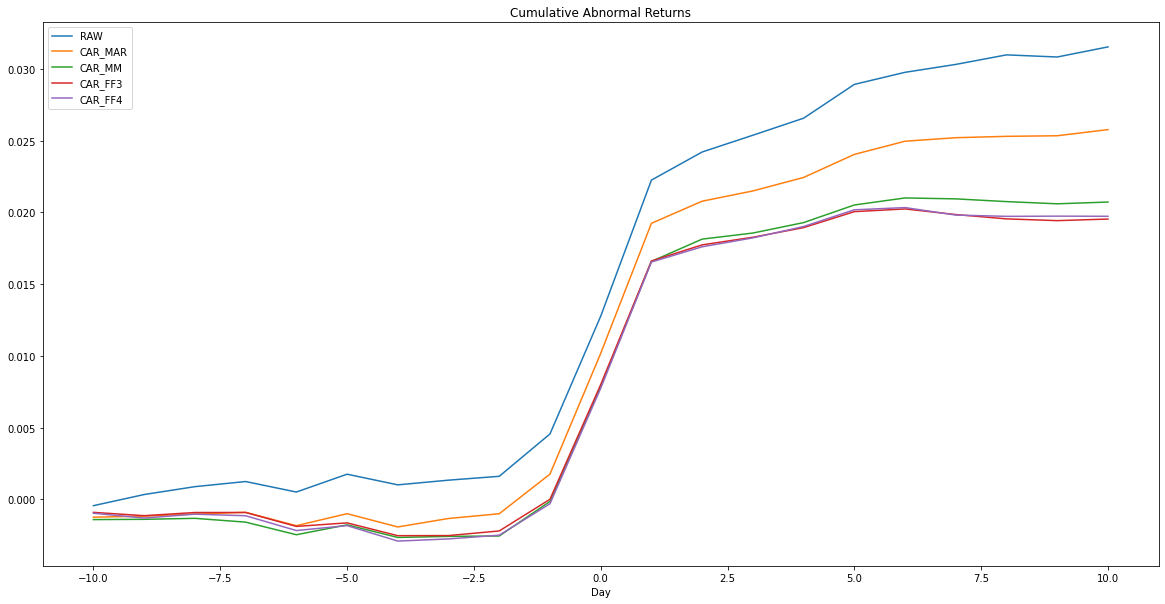

In [30]:
car_graph[['RAW', 'CAR_MAR', 'CAR_MM', 'CAR_FF3', 'CAR_FF4']]=car_graph.groupby(['permno','adate'])['ret','abret0','abret1','abret2','abret3'].transform(pd.Series.cumsum)
car_graph.groupby('day')['RAW', 'CAR_MAR', 'CAR_MM', 'CAR_FF3', 'CAR_FF4'].mean().plot(title='Cumulative Abnormal Returns', xlabel='Day', figsize=(20,10))

<AxesSubplot:xlabel='day', ylabel='CAR_FF3'>

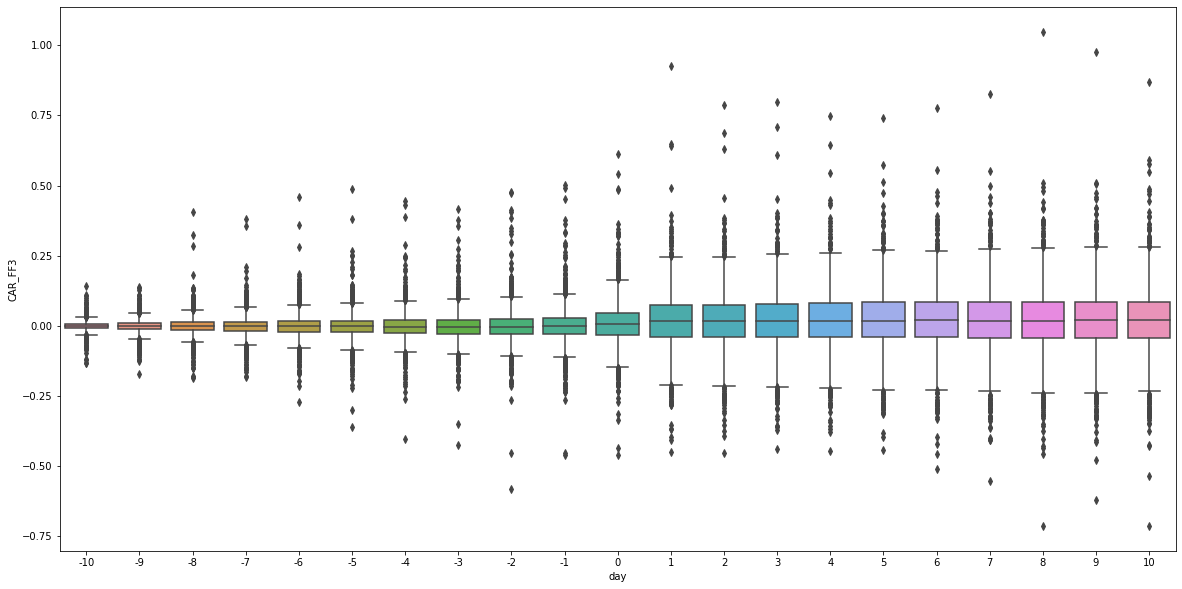

In [31]:
# Let's take a look of CAR distribution through days
fig, ax = plt.subplots(figsize=(20,10))
seaborn.boxplot(x = car_graph['day'], y = car_graph['CAR_FF3'], ax = ax)

## Generate the CAR panel

In [32]:
# OPTIONAL: You can reset Event Windows Here:
CAR_from=-5;                       #Beginning of event window of interest                                 
CAR_to=5;                         #End of event window of interest                                       
evtwin=CAR_to-CAR_from + 1;       #length of event window in trading days 

In [33]:
abrets_panel.to_sql('abrets_panel', local_sql, if_exists='replace') 

sqlcode=""" 
    select distinct permno, adate, nobs, 
    sum(abret0) as car0, sum(abret0)/sqrt( {} *var0) as scar0, /*evtwin*/
    sum(abret1) as car1, sum(abret1)/sqrt( {} *var1) as scar1, /*evtwin*/
    sum(abret2) as car2, sum(abret2)/sqrt( {} *var2) as scar2, /*evtwin*/
    sum(abret3) as car3, sum(abret3)/sqrt( {} *var3) as scar3  /*evtwin*/
    from abrets_panel
    where {} <=day /*CAR_from*/ and day<= {} /*CAR_to*/
    group by permno, adate;
""".format(evtwin,evtwin,evtwin,evtwin,CAR_from,CAR_to)

cars_panel=pd.read_sql_query(sqlcode, local_sql)

In [34]:
cars_panel

,permno,adate,nobs,car0,scar0,car1,scar1,car2,scar2,car3,scar3
0,10026.0,2016-12-08,200.0,0.067201,2.159372,0.077657,2.670542,0.079341,2.730745,0.068843,2.643032
1,10044.0,2012-05-03,200.0,0.156810,2.216888,0.138872,2.679188,0.145331,2.844848,0.133233,2.629505
2,10107.0,2004-07-20,200.0,0.041430,1.103353,0.050739,1.356217,0.056080,1.513807,0.057530,1.560263
3,10137.0,2007-10-04,200.0,0.037798,1.159975,0.027787,0.863736,0.028509,0.896887,0.029674,0.938871
4,10145.0,2008-12-12,200.0,0.195138,3.978421,0.212643,4.344507,0.207590,4.254077,0.209793,4.299689
...,...,...,...,...,...,...,...,...,...,...,...
1778,93382.0,2012-02-15,200.0,0.059653,0.493471,0.056321,0.552396,0.067128,0.672401,0.068208,0.683784
1779,93397.0,2014-06-25,200.0,-0.029646,-0.436453,-0.028036,-0.413455,-0.026475,-0.415482,-0.026592,-0.418098
1780,93399.0,2011-11-04,200.0,-0.007367,-0.071982,-0.012225,-0.119987,0.000241,0.002428,0.002336,0.023523
1781,93423.0,2012-10-24,200.0,-0.107541,-2.456240,-0.128890,-2.961199,-0.126487,-2.919774,-0.121470,-2.859177


In [35]:
test = pd.merge(event, cars_panel, how = 'outer', on = ['permno','adate']) # Missing observations list
nulldata = test[test.nobs.isnull() == True].reset_index(drop = True)
nulldata.head(20)

,permno,adate,crspday,nobs,car0,scar0,car1,scar1,car2,scar2,car3,scar3
0,11285.0,2022-02-07,25323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13019.0,2022-02-09,25325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13035.0,2022-02-03,25321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13116.0,2022-03-08,25343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13303.0,2022-03-02,25339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13935.0,2022-02-14,25328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14479.0,2022-02-24,25335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,14716.0,2022-02-16,25330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14855.0,2022-02-23,25334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15313.0,2022-02-03,25321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cars_panel.dropna().to_sql('cars_panel', local_sql, if_exists='replace') 

sqlcode=""" 
    select "MAR" as Model, avg(car0) as car, sum(car0>0) as pos, sum(car0<=0) as neg,
    avg(scar0)*sqrt(count(scar0)) as tpatel
    from cars_panel
    UNION
    select "MM" as Model, avg(car1) as car, sum(car1>0) as pos, sum(car1<=0) as neg,
    avg(scar1)*sqrt(count(scar1)) as tpatel
    from cars_panel
    UNION
    select "FF" as Model, avg(car2) as car, sum(car2>0) as pos, sum(car2<=0) as neg,
    avg(scar2)*sqrt(count(scar2)) as tpatel
    from cars_panel
    UNION
    select "FFM" as Model, avg(car3) as car, sum(car3>0) as pos, sum(car3<=0) as neg,
    avg(scar3)*sqrt(count(scar3)) as tpatel
    from cars_panel;
"""
cars_stats=pd.read_sql_query(sqlcode, local_sql)

#Relabeling the variables
cars_stats = cars_stats.rename(columns={'car': 'CAR('+str(CAR_from)+','+str(CAR_to)+')', 'tpatel': 'Patell t'})

In [37]:
cars_stats

,Model,"CAR(-5,5)",pos,neg,Patell t
0,FF,0.021895,1094,689,17.504966
1,FFM,0.022311,1094,689,18.107928
2,MAR,0.025880,1126,657,17.629438
3,MM,0.022952,1085,698,16.663712
